In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import json
import seaborn as sns

In [71]:
def save_json(name, data):
    with open(name, "w") as f:
         json.dump(data, f)
    print("created!!")

In [4]:
def load_json(name, data=None):
    with open(name, "r") as f:
         data = json.load(f)
    return data

In [5]:
SGI = pd.read_csv("./Seed_Genes_Intercom.csv")
I = pd.read_csv("./Intersection_Interactome.csv")
U = pd.read_csv("./Union_Interactome.csv")

In [6]:
#Graph generation
G_SGI = nx.from_pandas_edgelist(SGI, 'UniprotA', 'UniprotB')
G_I = nx.from_pandas_edgelist(I, 'UniprotA', 'UniprotB')
G_U = nx.from_pandas_edgelist(U, 'UniprotA', 'UniprotB')

In [7]:
'''
@return: plot the graph
'''
def graph_visualization(G):
    posi=nx.spring_layout(G)
    plt.figure(figsize=(16, 6))
    nx.draw_networkx(G, pos=posi, edge_color="grey", node_color="c", node_size=100, linewidths=10)
    plt.grid()
    plt.show()

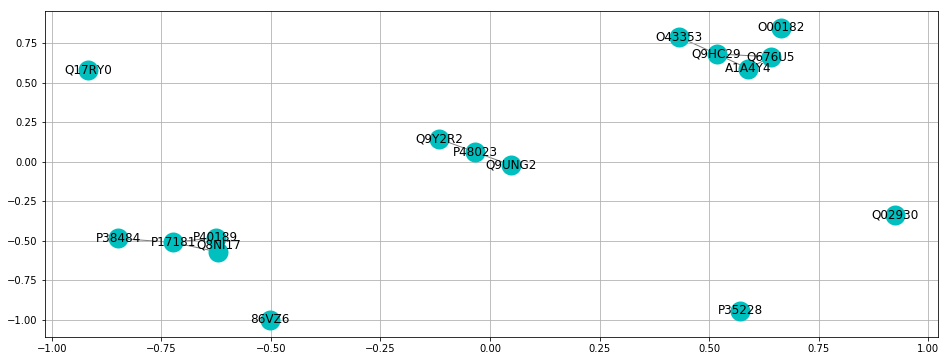

In [8]:
#SeedGene
graph_visualization(G_SGI)

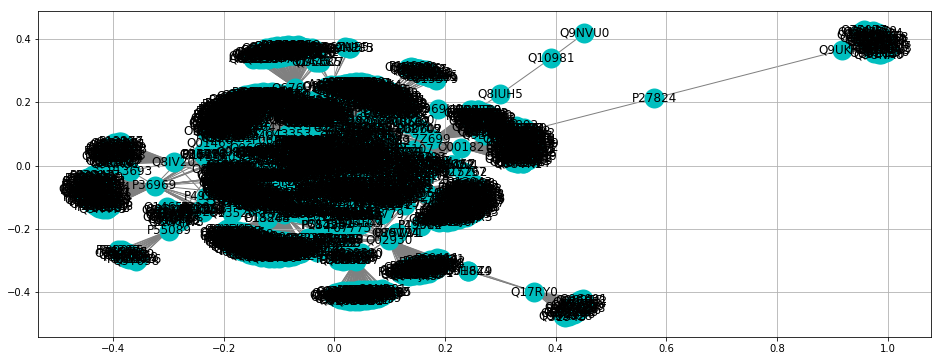

In [16]:
#Intersection
graph_visualization(G_I)

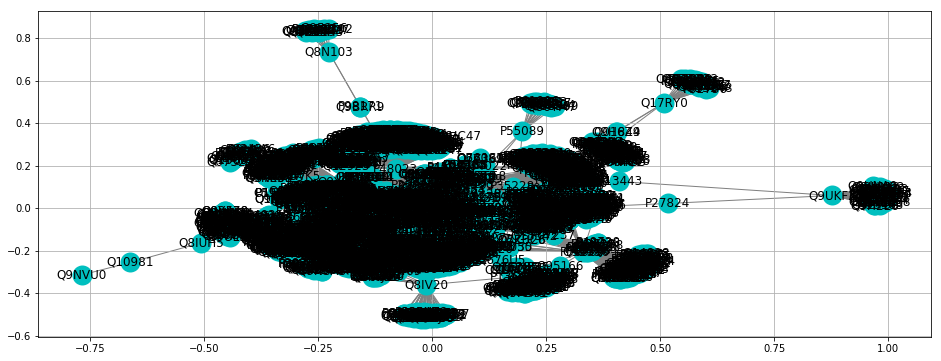

In [17]:
#Union
graph_visualization(G_U)

# 1.1

In [9]:
properties_I={}

# Node and Edge count

In [10]:
'''
@return: number of nodes and edges
'''
def nodes_edges_count(g):
    nodes=nx.number_of_nodes(g)
    edges=nx.number_of_edges(g)
    print("number of nodes: ", nodes)
    print("n edges: ", edges)
    return nodes, edges

In [11]:
node_count, edge_count = nodes_edges_count(G_SGI)

number of nodes:  16
n edges:  24


In [12]:
node_count, edge_count = nodes_edges_count(G_I)

number of nodes:  2038
n edges:  3173


In [13]:
properties_I["node_count"] = node_count
properties_I["edge_count"] = edge_count

In [14]:
node_count, edge_count = nodes_edges_count(G_U)

number of nodes:  2297
n edges:  3715


# N. of connected components

In [15]:
print(nx.number_connected_components(G_SGI))
print(nx.number_connected_components(G_I))
print(nx.number_connected_components(G_U))

8
1
1


In [16]:
properties_I["connected_components_count"] = nx.number_connected_components(G_I)

# N. of isolated nodes

In [18]:
properties_I["n_isolated_nodes"] = nx.isolates(G_I)
print(properties_I)
print(nx.number_of_isolates(G_SGI))

{'node_count': 2038, 'edge_count': 3173, 'connected_components_count': 1, 'n_isolated_nodes': <generator object isolates.<locals>.<genexpr> at 0x000000000B02D480>}
0


# Average path length for every sub-connection

In [19]:
'''
@return: list average shortest path lengths
'''
def average_path_length(G):
    averagePathLenList=[]
    for g in nx.connected_component_subgraphs(G):
        averagePathLenList.append(nx.average_shortest_path_length(g))
    return averagePathLenList

In [20]:
averagePathLen_SGI=average_path_length(G_SGI)
averagePathLen_SGI

[1.3333333333333333, 0, 0, 1.3333333333333333, 0, 1.3333333333333333, 0, 0]

In [21]:
averagePathLen_I=average_path_length(G_I)
averagePathLen_I

[3.6921577894332667]

In [22]:
properties_I["average_path_length"] = averagePathLen_I

In [23]:
averagePathLen_U=average_path_length(G_U)
averagePathLen_U

[3.6532691482148354]

# Average degree

In [24]:
averageDegree_SGI=nx.average_degree_connectivity(G_SGI)
averageDegree_SGI

{4: 2.8125, 5: 3.2, 2: 1.4166666666666667, 3: 2.466666666666667}

In [25]:
averageDegree_I=nx.average_degree_connectivity(G_I)
averageDegree_I

{1: 246.3117261471231,
 113: 1.5575221238938053,
 4: 301.4920634920635,
 3: 303.1303258145363,
 2: 316.2105263157895,
 5: 273.27272727272725,
 12: 192.91666666666666,
 90: 2.7444444444444445,
 6: 270.4270833333333,
 61: 1.6721311475409837,
 235: 3.1361702127659576,
 7: 271.0285714285714,
 8: 248.375,
 131: 6.175572519083969,
 442: 4.9434389140271495,
 14: 43.714285714285715,
 525: 4.102857142857143,
 27: 2.074074074074074,
 98: 6.551020408163265,
 201: 6.029850746268656,
 30: 2.4,
 305: 2.8491803278688526,
 336: 4.604166666666667,
 120: 7.633333333333334,
 36: 1.0277777777777777,
 148: 2.9864864864864864,
 47: 3.021276595744681,
 29: 2.1724137931034484,
 97: 1.865979381443299,
 88: 1.5909090909090908,
 18: 1.7222222222222223}

In [26]:
properties_I["average_degree"] = averageDegree_I

In [27]:
averageDegree_U=nx.average_degree_connectivity(G_U)
averageDegree_U

{131: 6.251908396946565,
 1: 276.94558725945586,
 3: 327.515503875969,
 4: 320.2804054054054,
 2: 326.2488317757009,
 442: 5.149321266968326,
 14: 22.464285714285715,
 30: 2.5,
 5: 303.804,
 36: 1.0555555555555556,
 27: 2.074074074074074,
 90: 2.8666666666666667,
 6: 289.8988095238095,
 13: 215.6153846153846,
 113: 1.6106194690265487,
 201: 6.323383084577115,
 7: 294.92857142857144,
 98: 6.775510204081633,
 9: 275.0,
 120: 7.825,
 336: 4.869047619047619,
 8: 281.625,
 47: 3.106382978723404,
 61: 1.721311475409836,
 148: 3.175675675675676,
 525: 4.28,
 305: 2.9311475409836065,
 235: 5.608510638297872,
 88: 1.75,
 29: 2.2413793103448274,
 97: 2.0618556701030926,
 18: 1.7777777777777777,
 488: 3.7663934426229506,
 44: 14.386363636363637}

# Average clustering coefficient for every sub-connection

In [28]:
'''
@return: list of average clustering co-efficients
'''
def average_clustering_coefficient(G):
    avgClusteringCoeff=[]
    for g in nx.connected_component_subgraphs(G):
        avgClusteringCoeff.append(nx.average_clustering(g)) 
    return avgClusteringCoeff

In [29]:
avgClusteringCoeff_SGI=average_clustering_coefficient(G_SGI)
avgClusteringCoeff_SGI

[0.5833333333333334, 0.0, 0.0, 0.0, 0.0, 0.5833333333333333, 0.0, 0.0]

In [30]:
avgClusteringCoeff_I=average_clustering_coefficient(G_I)
avgClusteringCoeff_I

[0.09199149389462898]

In [31]:
properties_I["average_clustering_coefficient"] = avgClusteringCoeff_I

In [32]:
avgClusteringCoeff_U=average_clustering_coefficient(G_U)
avgClusteringCoeff_U

[0.09647587955143391]

# Network Diameter and Radius

In [33]:
'''
@return: diameter and radius of the graph
'''
def compute_distance_radius(G):
    dia=[]
    radii=[]
    for g in nx.connected_component_subgraphs(G):
        dia.append(nx.diameter(g))
        radii.append(nx.radius(g))
    return dia, radii

In [34]:
dia_SGI, radii_SGI = compute_distance_radius(G_SGI)
print("dia, radii: ", dia_SGI, radii_SGI)

dia, radii:  [2, 0, 0, 2, 0, 2, 0, 0] [1, 0, 0, 1, 0, 1, 0, 0]


In [35]:
dia_I, radii_I = compute_distance_radius(G_I)
print("dia, radii: ", dia_I, radii_I)

dia, radii:  [8] [5]


In [36]:
properties_I["diameter"] = dia_I
properties_I["radius"] = radii_I

In [37]:
dia_U, radii_U = compute_distance_radius(G_U)
print("dia, radii: ", dia_U, radii_U)

dia, radii:  [8] [4]


# Centralization

In [38]:
def centralization(G):
    n=G.number_of_nodes()
    centralities=nx.degree_centrality(G).values()
    Centralization=(n*max(centralities) - sum(centralities))/ (n-1)**2
    return Centralization

In [39]:
Centralization_SGI = centralization(G_SGI)
Centralization_SGI

0.009481481481481481

In [40]:
Centralization_I = centralization(G_I)
Centralization_I

0.0001258365708677248

In [41]:
properties_I["centralization"] = Centralization_I

In [42]:
Centralization_U = centralization(G_U)
Centralization_U

9.901946496459822e-05

# 1.2

In [43]:
def globalss(G):
    nodes_count=nx.number_of_nodes(G)
    edges_count=nx.number_of_edges(G)
    averagePathLen=nx.average_shortest_path_length(G)
    averageDegree=nx.average_degree_connectivity(G)
    averageClustering=nx.average_clustering(G)
    dia=nx.diameter(G)
    radii=nx.radius(G)
    centrality=centralization(G)
    resultDict = {"nodes_count": nodes_count, "edges_count": edges_count, 
           "average path length": averagePathLen, "average degree connectivity": averageDegree, "average clustering connectivity": averageClustering, 
          "diameter": dia, "radius": radii, "centralization": centrality}
    return resultDict

In [44]:
LCC_SGI = max(nx.connected_component_subgraphs(G_SGI), key=len)
global_SGI = globalss(LCC_SGI)
print(global_SGI)

{'nodes_count': 4, 'edges_count': 8, 'average path length': 1.3333333333333333, 'average degree connectivity': {4: 3.25, 5: 3.2, 3: 2.6666666666666665}, 'average clustering connectivity': 0.5833333333333334, 'diameter': 2, 'radius': 1, 'centralization': 0.1481481481481481}


In [47]:
LCC_I = max(nx.connected_component_subgraphs(G_I), key=len)

global_I = globalss(LCC_I)
print(global_I)

{'nodes_count': 2038, 'edges_count': 3173, 'average path length': 3.6921577894332667, 'average degree connectivity': {12: 192.91666666666666, 1: 246.3117261471231, 2: 316.2105263157895, 201: 6.029850746268656, 3: 303.1303258145363, 5: 273.27272727272725, 4: 301.4920634920635, 235: 3.1361702127659576, 47: 3.021276595744681, 6: 270.4270833333333, 36: 1.0277777777777777, 7: 271.0285714285714, 88: 1.5909090909090908, 305: 2.8491803278688526, 525: 4.102857142857143, 97: 1.865979381443299, 148: 2.9864864864864864, 18: 1.7222222222222223, 336: 4.604166666666667, 30: 2.4, 29: 2.1724137931034484, 98: 6.551020408163265, 14: 43.714285714285715, 8: 248.375, 61: 1.6721311475409837, 442: 4.9434389140271495, 27: 2.074074074074074, 131: 6.175572519083969, 90: 2.7444444444444445, 113: 1.5575221238938053, 120: 7.633333333333334}, 'average clustering connectivity': 0.09199149389462898, 'diameter': 8, 'radius': 5, 'centralization': 0.0001258365708677248}


In [48]:
LCC_U = max(nx.connected_component_subgraphs(G_U), key=len)
global_U = globalss(LCC_U)
print(global_U)

{'nodes_count': 2297, 'edges_count': 3715, 'average path length': 3.6532691482148354, 'average degree connectivity': {13: 215.6153846153846, 1: 276.94558725945586, 2: 326.2488317757009, 3: 327.515503875969, 201: 6.323383084577115, 4: 320.2804054054054, 5: 303.804, 6: 289.8988095238095, 235: 5.608510638297872, 47: 3.106382978723404, 36: 1.0555555555555556, 7: 294.92857142857144, 88: 1.75, 305: 2.9311475409836065, 525: 4.28, 97: 2.0618556701030926, 44: 14.386363636363637, 148: 3.175675675675676, 18: 1.7777777777777777, 336: 4.869047619047619, 8: 281.625, 30: 2.5, 488: 3.7663934426229506, 29: 2.2413793103448274, 98: 6.775510204081633, 14: 22.464285714285715, 9: 275.0, 61: 1.721311475409836, 442: 5.149321266968326, 27: 2.074074074074074, 131: 6.251908396946565, 90: 2.8666666666666667, 113: 1.6106194690265487, 120: 7.825}, 'average clustering connectivity': 0.09647587955143391, 'diameter': 8, 'radius': 4, 'centralization': 9.901946496459822e-05}


In [49]:
'''
@return: 
'''
def localss(G):
    degreeCentrality = nx.degree_centrality(G)
    betweennessCentrality = nx.betweenness_centrality(G)
    closenessCentrality = nx.closeness_centrality(G)
    eigenvectorCentrality = nx.eigenvector_centrality_numpy(G)
    betweennessDxegreeCentarlityRatio= {x: betweennessCentrality[x]/degreeCentrality[x] for x in degreeCentrality}
    out = {"degree centrality": degreeCentrality, "betweenness centrality": betweennessCentrality, "closeness centrality": closenessCentrality, "eigenvalues centrality": eigenvectorCentrality, 
          "betweennessDxegreeCentarlityRatio": betweennessDxegreeCentarlityRatio}
    return out

In [50]:
local_SGI=localss(LCC_SGI)
print(local_SGI)

{'degree centrality': {'Q676U5': 1.3333333333333333, 'A1A4Y4': 1.3333333333333333, 'Q9HC29': 1.6666666666666665, 'O43353': 1.0}, 'betweenness centrality': {'Q676U5': 0.0, 'A1A4Y4': 0.0, 'Q9HC29': 0.6666666666666666, 'O43353': 0.0}, 'closeness centrality': {'Q676U5': 0.75, 'A1A4Y4': 0.75, 'Q9HC29': 1.0, 'O43353': 0.6}, 'eigenvalues centrality': {'Q676U5': 0.5227207256439812, 'A1A4Y4': 0.5227207256439812, 'Q9HC29': 0.6116284573553774, 'O43353': 0.281845198854869}, 'betweennessDxegreeCentarlityRatio': {'Q676U5': 0.0, 'A1A4Y4': 0.0, 'Q9HC29': 0.4, 'O43353': 0.0}}


In [51]:
local_I=localss(LCC_I)
print(local_I)

{'degree centrality': {nan: 0.005891016200294551, 'P78314': 0.0004909180166912126, 'Q9HBE4': 0.0009818360333824251, 'O94983': 0.0004909180166912126, 'Q9HAF1': 0.0004909180166912126, 'P10415': 0.0009818360333824251, 'Q7KZ85': 0.0004909180166912126, 'Q15369': 0.0004909180166912126, 'O00187': 0.0004909180166912126, 'O00635': 0.0004909180166912126, 'P37231': 0.0009818360333824251, 'P17181': 0.09867452135493372, 'Q8TAU0': 0.0014727540500736377, 'P19338': 0.0004909180166912126, 'Q2KHM9': 0.0004909180166912126, 'Q00653': 0.0009818360333824251, 'P43489': 0.0009818360333824251, 'Q9H112': 0.0004909180166912126, 'Q6UWP7': 0.0004909180166912126, 'Q9NS68': 0.0004909180166912126, 'Q8TAI7': 0.0004909180166912126, 'Q9NZU5': 0.0004909180166912126, 'P16435': 0.0004909180166912126, 'P35580': 0.0004909180166912126, 'P09564': 0.0009818360333824251, 'Q9ULV8': 0.0004909180166912126, 'O14543': 0.002454590083456063, 'P46937': 0.0004909180166912126, 'P08575': 0.0019636720667648502, 'P13725': 0.00147275405007363

In [52]:
local_U=localss(LCC_U)
print(local_U)

{'degree centrality': {nan: 0.005662020905923345, 'Q9UHR4': 0.00043554006968641115, 'P78314': 0.00043554006968641115, 'Q9HBE4': 0.0008710801393728223, 'O94983': 0.00043554006968641115, 'Q9HAF1': 0.00043554006968641115, 'P10415': 0.0013066202090592336, 'O00187': 0.00043554006968641115, 'Q7KZ85': 0.00043554006968641115, 'Q15369': 0.00043554006968641115, 'O00635': 0.0008710801393728223, 'P37231': 0.0008710801393728223, 'P17181': 0.08754355400696864, 'Q8TAU0': 0.0013066202090592336, 'P19338': 0.00043554006968641115, 'Q2KHM9': 0.00043554006968641115, 'P43489': 0.0017421602787456446, 'Q00653': 0.0008710801393728223, 'Q9H112': 0.00043554006968641115, 'Q6UWP7': 0.00043554006968641115, 'Q9NS68': 0.00043554006968641115, 'Q8TAI7': 0.00043554006968641115, 'O75618': 0.00043554006968641115, 'Q9NZU5': 0.00043554006968641115, 'Q13905': 0.00043554006968641115, 'P16435': 0.00043554006968641115, 'P35580': 0.00043554006968641115, 'P09564': 0.0008710801393728223, 'P23510': 0.00043554006968641115, 'Q9ULV8':

## 2.a: Data formating and Table generation

In [53]:
measurements = {"global_SGI":global_SGI, "global_I":global_I, "global_U":global_U, 
                 "local_SGI":local_SGI, "local_I":local_I, "local_U":local_U}

In [54]:
save_json("measurements.json", measurements)

created!!


## Local tables Creation

In [59]:
'''
@return: Dataframe with graph properties
'''
def table_creation(data):
    btwCentrality = [(k, data["betweenness centrality"][k]) for k in data["betweenness centrality"]]
    btwCentrality = sorted(btwCentrality, key=lambda u:u[1], reverse=True)
    
    degreeCentrality=[(k, data["degree centrality"][k]) for k in data["degree centrality"]]
    degreeCentrality = sorted(degreeCentrality, key=lambda u:u[1], reverse=True)
    
    genes_index=[]
    for i in range(len(btwCentrality)):
        if btwCentrality[i][1] != 0.0: 
            genes_index.append(btwCentrality[i][0])
        else:
            genes_index.append(degreeCentrality[i][0])
        
    table = {k:[] for k in data.keys()}
    genes_index = [x for x in genes_index if str(x) != 'NaN']
    cols=data.keys()
    for i in genes_index:
        for k in cols:
            table[k].append(data[k][i])
            
    table = pd.DataFrame(table, index=genes_index, columns=["betweenness centrality", "degree centrality", 
                                                              "closeness centrality", "eigenvalues centrality", "betweennessDxegreeCentarlityRatio"])
    return table

In [60]:
'''
@return: normalised data set
'''
def normalization(data):
    for k in data:
        if k not in ["betweennessDxegreeCentarlityRatio"]:
            index=[]
            values=[]
            for i in data[k]:
                index.append(i)
                values.append(data[k][i])
            values=np.array(values)
            m = max(values)
            values=values / m
            d={}
            for i in range(len(values)):
                d[index[i]] = values[i]
            data[k] = d.copy()
    return data

In [61]:
measurements = load_json("./measurements.json")

In [62]:
local_I_measure= measurements["local_I"]
local_I_norm=normalization(local_I_measure)
local_I_table = table_creation(local_I_norm)
local_I_table.to_csv("LCC_I_Local_Table.csv", index=False)

In [63]:
local_U_measure= measurements["local_U"]
local_U_norm=normalization(local_U_measure)
local_U_table = table_creation(local_U_norm)
local_U_table.to_csv("LCC_U_Local_Table.csv", index=False)

In [65]:
local_SGI_measure= measurements["local_SGI"]
local_SGI_norm=normalization(local_SGI_measure)
local_SGI_table = table_creation(local_SGI_norm)
local_SGI_table.to_csv("LCC_SGI_Local_Table.csv", index=False)

In [66]:
local_I_table

,betweenness centrality,degree centrality,closeness centrality,eigenvalues centrality,betweennessDxegreeCentarlityRatio
O43353,1.000000,1.000000,0.978728,1.000000,1.192468
Q9HC29,0.780724,0.841905,0.981512,0.883350,1.105812
P35228,0.684211,0.580952,0.869041,0.231188,1.404419
P40189,0.576813,0.640000,0.894795,0.529833,1.074737
Q9Y2R2,0.447448,0.447619,0.802092,0.214423,1.192014
O00182,0.420746,0.281905,0.803961,0.112880,1.779774
Q676U5,0.278738,0.249524,0.857777,0.111407,1.332084
P17181,0.276542,0.382857,0.877885,0.369708,0.861332
P36969,0.264840,0.215238,0.753666,0.034973,1.467274
Q02930,0.199751,0.171429,0.787449,0.032782,1.389483


In [67]:
local_U_table

,betweenness centrality,degree centrality,closeness centrality,eigenvalues centrality,betweennessDxegreeCentarlityRatio
P48023,1.000000,0.929524,0.897684,0.670841,1.431651
O43353,0.854096,1.000000,0.905825,1.000000,1.136591
Q9HC29,0.656444,0.841905,0.908042,0.894836,1.037606
P35228,0.592608,0.580952,0.815385,0.237527,1.357453
P40189,0.459443,0.640000,0.838147,0.584379,0.955320
Q9Y2R2,0.333900,0.447619,0.832238,0.319183,0.992673
O00182,0.279113,0.281905,0.763936,0.129716,1.317573
Q676U5,0.246618,0.249524,0.808656,0.112069,1.315255
P36969,0.234734,0.215238,0.737889,0.036528,1.451289
P17181,0.220060,0.382857,0.824314,0.401457,0.764894


In [68]:
local_SGI_table

,betweenness centrality,degree centrality,closeness centrality,eigenvalues centrality,betweennessDxegreeCentarlityRatio
Q9HC29,1.0,1.0,1.00,1.000000,0.4
Q676U5,0.0,0.8,0.75,0.854638,0.0
A1A4Y4,0.0,0.8,0.75,0.854638,0.0
O43353,0.0,0.6,0.60,0.460811,0.0
